In [29]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

In [30]:
SAMPLE_LENGTHS = [3, 6, 11, 31, 101]
M_RUNS = 50
CORRELATIONS = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8]
EXTINCTION_RATES = [0, 0.5, 1.]
RBF_SIGMAS = [0.5, 1., 4., 6., 8.]
DYADIC_ORDERS = [0, 2, 4]
A=[0., 0.2, 0.5, 0.8]

KERNELS_NORMALIZED = [ ('', None) ] 
KERNELS_NORMALIZED += [ ('', sigma) for sigma in RBF_SIGMAS ]
KERNELS_UNNORMALIZED = [ ('', None) ] 
KERNELS_UNNORMALIZED += [ ('', sigma) for sigma in RBF_SIGMAS ]

In [61]:
IDX = pd.IndexSlice

In [31]:
with open('pickles/intermediate_results_2022-04-26T07.06.35.918534.pickle', 'rb') as f:
    res = pickle.load(f)

In [32]:
runs = [m for m in range(M_RUANS)]

In [33]:
def fix_res(res):
    len_iter = len(EXTINCTION_RATES)*(len(KERNELS_UNNORMALIZED) + len(KERNELS_NORMALIZED))*len(runs)*len(DYADIC_ORDERS)
    len_iter += len(CORRELATIONS)*(len(KERNELS_UNNORMALIZED) + len(KERNELS_NORMALIZED))*len(runs)*len(DYADIC_ORDERS)
    
    for i, (sl, a) in enumerate(product(SAMPLE_LENGTHS, A)): # DIFF PROD HERE
        for k, (ext_rate, (ukernel, ukernel_param), run, order) in enumerate(product(EXTINCTION_RATES, KERNELS_NORMALIZED + KERNELS_UNNORMALIZED, runs, DYADIC_ORDERS)):
            if i*len_iter + k >= len(res):
                return None
            else:
                assert res[i*len_iter + k]['process_type'] == 'extinct_gaussian', "at {}".format(i*len_iter + k)
                res[i*len_iter + k]['sample_length'] = sl
                res[i*len_iter + k]['process_param'] = ext_rate
        for l, (corr, (ukernel, ukernel_param), run, order) in enumerate(product(CORRELATIONS, KERNELS_NORMALIZED + KERNELS_UNNORMALIZED, runs, DYADIC_ORDERS)):
            if i*len_iter + k + l + 1 >= len(res):
                return None
            else:
                assert res[i*len_iter + k + l + 1]['process_type'] == 'lin_corr', "at {}".format(i*len_iter + k + l +1)
                res[i*len_iter + k + l + 1]['sample_length'] = sl
                res[i*len_iter + k + l + 1]['process_param'] = corr

In [34]:
fix_res(res)

In [35]:
df = pd.DataFrame(res)

In [58]:
INDEX = ['kernel_type', 'kernel_param', 'dyadic_order', 'process_type', 'a', 'process_param', 'sample_length']

In [119]:
nice_df = df.set_index(INDEX)

In [120]:
null_true_df = nice_df.loc[IDX[:, :, :, :, :, 0., :]]
null_false_df = nice_df[~nice_df.index.isin(null_true_df.index)]

In [121]:
for i in null_true_df.index.unique():
    null_true_df.loc[i, 'type_1_error'] = (null_true_df.loc[i]['p_val'] < 0.05).mean()

/home/ocmob/miniconda3/envs/signatures/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [122]:
for i in null_false_df.index.unique():
    null_false_df.loc[i, 'type_2_error'] = (null_false_df.loc[i]['p_val'] > 0.05).mean()

/home/ocmob/miniconda3/envs/signatures/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [123]:
null_true_df.sort_values('type_1_error').index.unique()

MultiIndex([(  'normalized', 1.0, 4, 'extinct_gaussian', 0.2, 0.0, 3),
            ('unnormalized', 1.0, 0, 'extinct_gaussian', 0.0, 0.0, 6),
            (  'normalized', 1.0, 2, 'extinct_gaussian', 0.0, 0.0, 3),
            ('unnormalized', 0.5, 0, 'extinct_gaussian', 0.2, 0.0, 3),
            ('unnormalized', 8.0, 0,         'lin_corr', 0.0, 0.0, 3),
            ('unnormalized', nan, 0, 'extinct_gaussian', 0.5, 0.0, 3),
            ('unnormalized', 6.0, 0,         'lin_corr', 0.5, 0.0, 3),
            ('unnormalized', 0.5, 4, 'extinct_gaussian', 0.0, 0.0, 3),
            (  'normalized', nan, 4,         'lin_corr', 0.0, 0.0, 6),
            ('unnormalized', nan, 2,         'lin_corr', 0.2, 0.0, 3),
            ...
            (  'normalized', 0.5, 2,         'lin_corr', 0.0, 0.0, 6),
            (  'normalized', 8.0, 2,         'lin_corr', 0.0, 0.0, 3),
            ('unnormalized', 0.5, 4,         'lin_corr', 0.8, 0.0, 3),
            (  'normalized', 6.0, 0, 'extinct_gaussian', 0.0,

In [124]:
null_false_df.sort_values('type_2_error').index.unique()

MultiIndex([('unnormalized', 8.0, 4,         'lin_corr', 0.0, 0.5, 6),
            ('unnormalized', 4.0, 0,         'lin_corr', 0.0, 0.5, 3),
            ('unnormalized', 4.0, 2,         'lin_corr', 0.0, 0.5, 3),
            ('unnormalized', 4.0, 4,         'lin_corr', 0.0, 0.5, 3),
            ('unnormalized', 6.0, 0,         'lin_corr', 0.0, 0.5, 3),
            ('unnormalized', 6.0, 2,         'lin_corr', 0.0, 0.5, 3),
            ('unnormalized', 6.0, 4,         'lin_corr', 0.0, 0.5, 3),
            (  'normalized', 8.0, 2,         'lin_corr', 0.0, 0.5, 3),
            (  'normalized', 8.0, 4,         'lin_corr', 0.0, 0.5, 3),
            (  'normalized', 8.0, 0,         'lin_corr', 0.0, 0.5, 3),
            ...
            ('unnormalized', 1.0, 0, 'extinct_gaussian', 0.0, 0.5, 6),
            (  'normalized', nan, 0, 'extinct_gaussian', 0.8, 1.0, 3),
            ('unnormalized', nan, 2, 'extinct_gaussian', 0.0, 0.5, 6),
            ('unnormalized', 4.0, 2, 'extinct_gaussian', 0.8,

In [125]:
null_false_df.sort_values('type_2_error')

hsic_score  \
kernel_type  kernel_param dyadic_order process_type     a   process_param sample_length               
unnormalized 8.0          4            lin_corr         0.0 0.5           6                0.067766   
             4.0          0            lin_corr         0.0 0.5           3                0.054188   
                          2            lin_corr         0.0 0.5           3                0.087524   
                          4            lin_corr         0.0 0.5           3                0.059754   
                          0            lin_corr         0.0 0.5           3                0.071722   
...                                                                                             ...   
normalized   8.0          2            extinct_gaussian 0.0 0.5           6                0.034265   
             1.0          2            extinct_gaussian 0.8 1.0           3                0.062536   
                          0            extinct_gaussian 0.8 1.0           3                0.050279   
                                                                          3                0.051522   
             6.0          4            extinct_gaussian 0.5 1.0           3                0.013309   

                                                                                         p_val  \
kernel_type  kernel_param dyadic_order process_type     a   process_param sample_length          
unnormalized 8.0          4            lin_corr         0.0 0.5           6               0.00   
             4.0          0            lin_corr         0.0 0.5           3               0.00   
                          2            lin_corr         0.0 0.5           3               0.00   
                          4            lin_corr         0.0 0.5           3               0.00   
                          0            lin_corr         0.0 0.5           3               0.00   
...                                                                                        ...   
normalized   8.0          2            extinct_gaussian 0.0 0.5           6               0.88   
             1.0          2            extinct_gaussian 0.8 1.0           3               0.68   
                          0            extinct_gaussian 0.8 1.0           3               0.82   
                                                                          3               0.96   
             6.0          4            extinct_gaussian 0.5 1.0           3               0.12   

                                                                                         type_2_error  
kernel_type  kernel_param dyadic_order process_type     a   process_param sample_length                
unnormalized 8.0          4            lin_corr         0.0 0.5           6                       0.0  
             4.0          0            lin_corr         0.0 0.5           3                       0.0  
                          2            lin_corr         0.0 0.5           3                       0.0  
                          4            lin_corr         0.0 0.5           3                       0.0  
                          0            lin_corr         0.0 0.5           3                       0.0  
...                                                                                               ...  
normalized   8.0          2            extinct_gaussian 0.0 0.5           6                       1.0  
             1.0          2            extinct_gaussian 0.8 1.0           3                       1.0  
                          0            extinct_gaussian 0.8 1.0           3                       1.0  
                                                                          3                       1.0  
             6.0          4            extinct_gaussian 0.5 1.0           3                       1.0  

[70200 rows x 3 columns]

/home/ocmob/miniconda3/envs/signatures/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
/home/ocmob/miniconda3/envs/signatures/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


<AxesSubplot:>

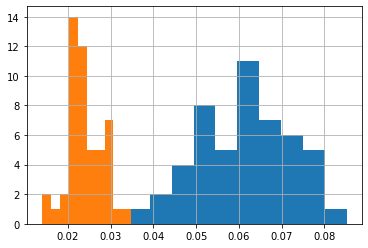

In [130]:
null_false_df.loc[('normalized', 8.0, 4, 'lin_corr', 0.0, 0.5, 6)]['hsic_score'].hist()
null_true_df.loc[('normalized', 8.0, 4, 'lin_corr', 0.0, 0., 6)]['hsic_score'].hist()

In [151]:
IDX['normalized', :, :, :, :, :, :]

('normalized',
 slice(None, None, None),
 slice(None, None, None),
 slice(None, None, None),
 slice(None, None, None),
 slice(None, None, None),
 slice(None, None, None))

In [155]:
def get_type_1_error_for_index(idx_in):
    index_norm = null_true_df.loc[IDX['normalized', :, :, :, :, :, :]].index
    index_unnorm = null_true_df.loc[IDX['unnormalized', :, :, :, :, :, :]].index
    index_in = null_true_df.loc[idx_in].index
    
    t_1_norm = null_true_df.loc[index_norm.intersection(index_in)]['type_1_error'].mean()
    t_1_unnorm = null_true_df.loc[index_unnorm.intersection(index_in)]['type_1_error'].mean()
    
    return t_1_norm, t_1_unnorm

In [156]:
def get_type_2_error_for_index(idx_in):
    index_norm = null_false_df.loc[IDX['normalized', :, :, :, :, :, :]].index
    index_unnorm = null_false_df.loc[IDX['unnormalized', :, :, :, :, :, :]].index
    index_in = null_false_df.loc[idx_in].index
    
    t_2_norm = null_false_df.loc[index_norm.intersection(index_in)]['type_2_error'].mean()
    t_2_unnorm = null_false_df.loc[index_unnorm.intersection(index_in)]['type_2_error'].mean()
    
    return t_2_norm, t_2_unnorm

In [157]:
def get_errors_for_index(idx_in):
    t_1_norm, t_1_unnorm = get_type_1_error_for_index(idx_in)
    t_2_norm, t_2_unnorm = get_type_2_error_for_index(idx_in)
    
    return t_1_norm, t_1_unnorm, t_2_norm, t_2_unnorm

In [158]:
def print_errors_for_index(idx_in):
    t_1_norm, t_1_unnorm, t_2_norm, t_2_unnorm = get_errors_for_index(idx_in)
    
    print('Type 1, normalized = {}'.format(t_1_norm))
    print('Type 1, unnormalized = {}'.format(t_1_unnorm))
    print('Type 2, normalized = {}'.format(t_2_norm))
    print('Type 2, unnormalized = {}'.format(t_2_unnorm))
                

# Test errors: aggregate

In [159]:
print_errors_for_index(IDX[:, :, :, :, :, :, :])

Type 1, normalized = 0.06200000000000086
Type 1, unnormalized = 0.0597777777777783
Type 2, normalized = 0.5468091168090876
Type 2, unnormalized = 0.5466381766381431


# Test errors: linear correlation

In [160]:
print_errors_for_index(IDX[:, :, :, 'lin_corr', :, :, :])

Type 1, normalized = 0.0660000000000019
Type 1, unnormalized = 0.06511111111111341
Type 2, normalized = 0.42432950191571195
Type 2, unnormalized = 0.42655172413792014


# Test errors: extinct gaussian

In [161]:
print_errors_for_index(IDX[:, :, :, 'extinct_gaussian', :, :, :])

Type 1, normalized = 0.0580000000000017
Type 1, unnormalized = 0.054444444444445385
Type 2, normalized = 0.9019999999999259
Type 2, unnormalized = 0.894888888888848


# Test errors: linear kernel

In [163]:
print_errors_for_index(IDX[:, float('nan'), :, :, :, :, :])

Type 1, normalized = 0.06266666666666722
Type 1, unnormalized = 0.05666666666666732
Type 2, normalized = 0.6476923076923174
Type 2, unnormalized = 0.6473504273504421


# Test errors: gaussian kernel

In [166]:
for sigma in RBF_SIGMAS:
    print(f'Sigma = {sigma}')
    print_errors_for_index(IDX[:, sigma, :, :, :, :, :])
    print()

Sigma = 0.5
Type 1, normalized = 0.06399999999999992
Type 1, unnormalized = 0.06399999999999999
Type 2, normalized = 0.6654700854701064
Type 2, unnormalized = 0.6637606837607054

Sigma = 1.0
Type 1, normalized = 0.06000000000000083
Type 1, unnormalized = 0.05933333333333459
Type 2, normalized = 0.585982905982919
Type 2, unnormalized = 0.5842735042735214

Sigma = 4.0
Type 1, normalized = 0.05800000000000043
Type 1, unnormalized = 0.055999999999999384
Type 2, normalized = 0.47589743589744227
Type 2, unnormalized = 0.4747008547008585

Sigma = 6.0
Type 1, normalized = 0.0640000000000007
Type 1, unnormalized = 0.06400000000000057
Type 2, normalized = 0.4589743589743673
Type 2, unnormalized = 0.461367521367522

Sigma = 8.0
Type 1, normalized = 0.06333333333333385
Type 1, unnormalized = 0.05866666666666671
Type 2, normalized = 0.4468376068376122
Type 2, unnormalized = 0.4483760683760782



# Test errors: kernel w. extinct

In [168]:
for sigma in RBF_SIGMAS:
    print(f'Sigma = {sigma}')
    print_errors_for_index(IDX[:, sigma, :, 'extinct_gaussian', :, :, :])
    print()

Sigma = 0.5
Type 1, normalized = 0.06133333333333356
Type 1, unnormalized = 0.061333333333332886
Type 2, normalized = 0.781333333333342
Type 2, unnormalized = 0.7693333333333412

Sigma = 1.0
Type 1, normalized = 0.051999999999999394
Type 1, unnormalized = 0.05599999999999974
Type 2, normalized = 0.8046666666666727
Type 2, unnormalized = 0.7986666666666749

Sigma = 4.0
Type 1, normalized = 0.05733333333333331
Type 1, unnormalized = 0.046666666666666023
Type 2, normalized = 0.935333333333347
Type 2, unnormalized = 0.9300000000000057

Sigma = 6.0
Type 1, normalized = 0.06266666666666608
Type 1, unnormalized = 0.06133333333333348
Type 2, normalized = 0.9546666666666734
Type 2, unnormalized = 0.9486666666666833

Sigma = 8.0
Type 1, normalized = 0.055999999999999675
Type 1, unnormalized = 0.048000000000000126
Type 2, normalized = 0.9633333333333465
Type 2, unnormalized = 0.9580000000000133



In [170]:
print_errors_for_index(IDX[:, float('nan'), :, 'extinct_gaussian', :, :, :])

Type 1, normalized = 0.058666666666666305
Type 1, unnormalized = 0.053333333333332976
Type 2, normalized = 0.9726666666666833
Type 2, unnormalized = 0.9646666666666861


# Test errors: kernel w. linear

In [171]:
for sigma in RBF_SIGMAS:
    print(f'Sigma = {sigma}')
    print_errors_for_index(IDX[:, sigma, :, 'lin_corr', :, :, :])
    print()

print('linker')
print_errors_for_index(IDX[:, float('nan'), :, 'lin_corr', :, :, :])

Sigma = 0.5
Type 1, normalized = 0.06666666666666642
Type 1, unnormalized = 0.0666666666666667
Type 2, normalized = 0.6255172413793221
Type 2, unnormalized = 0.6273563218390878

Sigma = 1.0
Type 1, normalized = 0.06799999999999953
Type 1, unnormalized = 0.06266666666666605
Type 2, normalized = 0.5105747126436805
Type 2, unnormalized = 0.510344827586223

Sigma = 4.0
Type 1, normalized = 0.058666666666666506
Type 1, unnormalized = 0.06533333333333338
Type 2, normalized = 0.3174712643678132
Type 2, unnormalized = 0.3177011494252892

Sigma = 6.0
Type 1, normalized = 0.06533333333333315
Type 1, unnormalized = 0.06666666666666653
Type 2, normalized = 0.2880459770114899
Type 2, unnormalized = 0.29333333333333866

Sigma = 8.0
Type 1, normalized = 0.07066666666666657
Type 1, unnormalized = 0.06933333333333383
Type 2, normalized = 0.26873563218390434
Type 2, unnormalized = 0.27264367816091867

linker
Type 1, normalized = 0.06666666666666612
Type 1, unnormalized = 0.060000000000000046
Type 2, nor

# Agg vs. sample length

In [175]:
print_errors_for_index(IDX[:, :, :, :, :, :, 3])

Type 1, normalized = 0.061527777777779964
Type 1, unnormalized = 0.06013888888888976
Type 2, normalized = 0.5199305555555402
Type 2, unnormalized = 0.520381944444413


In [176]:
print_errors_for_index(IDX[:, :, :, :, :, :, 6])

Type 1, normalized = 0.06388888888888986
Type 1, unnormalized = 0.05833333333333421
Type 2, normalized = 0.6696825396825491
Type 2, unnormalized = 0.6666666666666896


# Agg vs. A

In [178]:
for a in A:
    print(f'A = {a}')
    print_errors_for_index(IDX[:, :, :, :, a, :, :])
    print()

A = 0.0
Type 1, normalized = 0.06472222222222203
Type 1, unnormalized = 0.05361111111111069
Type 2, normalized = 0.5728888888888607
Type 2, unnormalized = 0.572666666666655

A = 0.2
Type 1, normalized = 0.055000000000000424
Type 1, unnormalized = 0.06611111111111136
Type 2, normalized = 0.49722222222223383
Type 2, unnormalized = 0.49513888888889035

A = 0.5
Type 1, normalized = 0.06055555555555628
Type 1, unnormalized = 0.06000000000000074
Type 2, normalized = 0.5270833333333446
Type 2, unnormalized = 0.5219444444444559

A = 0.8
Type 1, normalized = 0.06499999999999942
Type 1, unnormalized = 0.06555555555555606
Type 2, normalized = 0.5672222222222357
Type 2, unnormalized = 0.5740277777777877



# Agg vs. Dyadic Order

In [179]:
for order in DYADIC_ORDERS:
    print(f'Order = {order}')
    print_errors_for_index(IDX[:, :, order, :, :, :, :])
    print()

Order = 0
Type 1, normalized = 0.05933333333333412
Type 1, unnormalized = 0.05600000000000013
Type 2, normalized = 0.5300854700854649
Type 2, unnormalized = 0.5250427350427308

Order = 2
Type 1, normalized = 0.06633333333333444
Type 1, unnormalized = 0.059666666666667235
Type 2, normalized = 0.5502564102563936
Type 2, unnormalized = 0.5576068376068339

Order = 4
Type 1, normalized = 0.060333333333334294
Type 1, unnormalized = 0.06366666666666752
Type 2, normalized = 0.560085470085448
Type 2, unnormalized = 0.5572649572649403



# Agg vs. Dyadic Order vs. kernel

In [181]:
for order in DYADIC_ORDERS:
    for sigma in RBF_SIGMAS:
        print(f'Order = {order}, Sigma = {sigma}')
        print_errors_for_index(IDX[:, sigma, order, :, :, :, :])
        print()

    print(f'Order = {order}, linker')
    print_errors_for_index(IDX[:, float('nan'), order, :, :, :, :])
    print()

Order = 0, Sigma = 0.5
Type 1, normalized = 0.059999999999999394
Type 1, unnormalized = 0.0639999999999998
Type 2, normalized = 0.6548717948717927
Type 2, unnormalized = 0.6507692307692317

Order = 0, Sigma = 1.0
Type 1, normalized = 0.05599999999999954
Type 1, unnormalized = 0.057999999999999476
Type 2, normalized = 0.5769230769230836
Type 2, unnormalized = 0.5661538461538485

Order = 0, Sigma = 4.0
Type 1, normalized = 0.05599999999999978
Type 1, unnormalized = 0.05799999999999982
Type 2, normalized = 0.4789743589743597
Type 2, unnormalized = 0.46923076923077284

Order = 0, Sigma = 6.0
Type 1, normalized = 0.07399999999999947
Type 1, unnormalized = 0.06199999999999968
Type 2, normalized = 0.4584615384615408
Type 2, unnormalized = 0.4553846153846186

Order = 0, Sigma = 8.0
Type 1, normalized = 0.05599999999999937
Type 1, unnormalized = 0.053999999999999944
Type 2, normalized = 0.45025641025641544
Type 2, unnormalized = 0.44717948717949185

Order = 0, linker
Type 1, normalized = 0.0539

# Agg vs. Dyadic Order vs. task

In [182]:
for order in DYADIC_ORDERS:
    print(f'Order = {order}')
    print_errors_for_index(IDX[:, :, order, 'lin_corr', :, :, :])
    print_errors_for_index(IDX[:, :, order, 'extinct_gaussian', :, :, :])
    print()

Order = 0
Type 1, normalized = 0.06200000000000031
Type 1, unnormalized = 0.059333333333333654
Type 2, normalized = 0.40160919540230133
Type 2, unnormalized = 0.39977011494253184
Type 1, normalized = 0.056666666666666636
Type 1, unnormalized = 0.05266666666666697
Type 2, normalized = 0.9026666666666894
Type 2, unnormalized = 0.8883333333333623

Order = 2
Type 1, normalized = 0.07133333333333351
Type 1, unnormalized = 0.05866666666666716
Type 2, normalized = 0.42931034482759556
Type 2, unnormalized = 0.4375862068965595
Type 1, normalized = 0.06133333333333379
Type 1, unnormalized = 0.060666666666667035
Type 2, normalized = 0.9010000000000221
Type 2, unnormalized = 0.9056666666666843

Order = 4
Type 1, normalized = 0.06466666666666711
Type 1, unnormalized = 0.07733333333333382
Type 2, normalized = 0.442068965517252
Type 2, unnormalized = 0.44229885057471874
Type 1, normalized = 0.056000000000000084
Type 1, unnormalized = 0.05000000000000015
Type 2, normalized = 0.9023333333333445
Type 2,